# Modelo de Regressão Linear (LinearRegression)

### Usado para prever o consumo de combustível de um veículo

## Importando Pacotes

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

c:\users\guilherme garcia\miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\guilherme garcia\miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Lendo Dados

In [3]:
df = pd.read_csv(r'measurements.csv')

In [4]:
print(df.head())

  distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0       28       5     26        21,5            12      NaN      E10   0   
1       12     4,2     30        21,5            13      NaN      E10   0   
2     11,2     5,5     38        21,5            15      NaN      E10   0   
3     12,9     3,9     36        21,5            14      NaN      E10   0   
4     18,5     4,5     46        21,5            15      NaN      E10   0   

   rain  sun refill liters refill gas  
0     0    0            45        E10  
1     0    0           NaN        NaN  
2     0    0           NaN        NaN  
3     0    0           NaN        NaN  
4     0    0           NaN        NaN  


In [5]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

## Preparação e tratamento dos dados

In [6]:
df = df.fillna(0)

In [7]:
df['consume'] = df['consume'].str.replace(',', ".").astype(float)

In [8]:
df['distance'] = df['distance'].str.replace(',', ".").astype(float)

In [9]:
df['temp_inside'] = df['temp_inside'].str.replace(',', ".").astype(float)

In [10]:
df.describe

<bound method NDFrame.describe of      distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12        0      E10   
1        12.0      4.2     30         21.5            13        0      E10   
2        11.2      5.5     38         21.5            15        0      E10   
3        12.9      3.9     36         21.5            14        0      E10   
4        18.5      4.5     46         21.5            15        0      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      3.7     39         24.5            18        0     SP98   
384      16.1      4.3     38         25.0            31       AC     SP98   
385      16.0      3.8     45         25.0            19        0     SP98   
386      15.4      4.6     42         25.0            31       AC     SP98   
387      14.7      5.0     25         25.0            30       AC     SP98   

     AC  rain  sun refill lit

## Aplicando one hot encode nas colunas "gas_type" e "refill gas"

In [137]:
df_one_hot = pd.concat([df, pd.get_dummies(df["gas_type"],prefix='gas_type')], axis=1, join='inner')

In [138]:
df_one_hot = pd.concat([df_one_hot, pd.get_dummies(df["refill gas"],prefix='refill_gas')], axis=1, join='inner')

In [139]:
df_one_hot.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_E10,gas_type_SP98,refill_gas_0,refill_gas_E10,refill_gas_SP98
0,28.0,5.0,26,21.5,12,0,E10,0,0,0.0,45,E10,1,0,0,1,0
1,12.0,4.2,30,21.5,13,0,E10,0,0,0.0,0,0,1,0,1,0,0
2,11.2,5.5,38,21.5,15,0,E10,0,0,0.0,0,0,1,0,1,0,0
3,12.9,3.9,36,21.5,14,0,E10,0,0,0.0,0,0,1,0,1,0,0
4,18.5,4.5,46,21.5,15,0,E10,0,0,0.0,0,0,1,0,1,0,0


In [14]:
df_one_hot.dtypes

distance           float64
consume            float64
speed                int64
temp_inside        float64
temp_outside         int64
specials            object
gas_type            object
AC                   int64
rain                 int64
sun                  int64
refill liters       object
refill gas          object
gas_type_E10         uint8
gas_type_SP98        uint8
refill_gas_0         uint8
refill_gas_E10       uint8
refill_gas_SP98      uint8
dtype: object

In [15]:
df_tratado = df_one_hot[['distance','consume','speed','temp_inside','temp_outside','specials','AC','rain','sun','refill liters','gas_type_E10','gas_type_SP98','refill_gas_E10','refill_gas_SP98']]

In [16]:
df_tratado.head()

,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun,refill liters,gas_type_E10,gas_type_SP98,refill_gas_E10,refill_gas_SP98
0,28.0,5.0,26,21.5,12,0,0,0,0,45,1,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,0,0,1,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0,0,1,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0,0,1,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0,0,1,0,0,0


## Gerando profilling da base usando o Pandas Profilling para análise de estatisticas basicas

In [17]:
from pandas_profiling import ProfileReport

In [18]:
profile = ProfileReport(df_tratado, title="Profilling")

c:\users\guilherme garcia\miniconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


c:\users\guilherme garcia\miniconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [19]:
profile

## Criando correlação de Pearson entre as variaveis para definir as mais importantes

In [20]:
import numpy as np
import seaborn as sns

In [21]:
corrmat = df_tratado.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

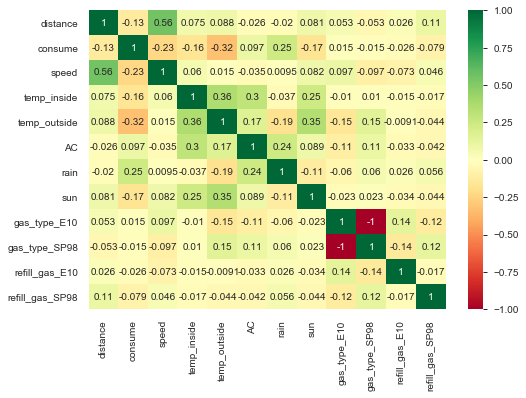

In [22]:
g=sns.heatmap(df_tratado[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Tratando mais algumas colunas

In [103]:
df_tratado['temp_inside'] = df_tratado['temp_inside'].replace(',','.').astype(float)

In [105]:
df_tratado['temp_outside'] = df_tratado['temp_outside'].replace(',','.').astype(float)

In [114]:
df_tratado['refill liters'] = df_tratado['refill liters'].str.replace(',','.').astype(float)

In [122]:
df_tratado = df_tratado.fillna(0)

## Definindo variaveis X e target Y

In [123]:
X = df_tratado[['distance','speed','temp_outside','temp_inside','AC','sun','rain','refill liters','gas_type_E10','gas_type_SP98','refill_gas_E10','refill_gas_SP98']]

In [124]:
y = df_tratado['consume']

## Separando a base em treino e teste

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [126]:
X_train.count()

distance           271
speed              271
temp_outside       271
temp_inside        271
AC                 271
sun                271
rain               271
refill liters      271
gas_type_E10       271
gas_type_SP98      271
refill_gas_E10     271
refill_gas_SP98    271
dtype: int64

In [127]:
y_train.count()

271

## Treinando o modelo de Regressão Linear

In [128]:
regressor = LinearRegression()

In [129]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
y_pred = regressor.predict(X_test)

In [131]:
df_pos = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [132]:
df_pos

,Actual,Predicted
54,6.4,5.175235
124,4.6,5.955512
263,5.4,4.945648
175,4.4,5.181628
282,3.8,5.028361
...,...,...
113,4.9,4.677025
301,5.0,4.873113
155,5.2,4.991302
158,5.3,5.408410


## Medindo precisão do modelo pelo MSE

In [133]:
from sklearn.metrics import mean_squared_error

In [134]:
mean_squared_error(y_test, y_pred)

1.1303684012568296

In [140]:
regressor.coef_

array([ 0.00329749, -0.01540254, -0.04396069,  0.01062348,  0.29726511,
       -0.2316939 ,  0.54788666, -0.01160308, -0.03771079,  0.03771079,
        0.06835855, -0.87260483])

In [141]:
regressor.intercept_

5.6719608964876675